# AUGMENTED DICKEY-FULLER TEST IN PYTHON

In this notebook we are going to implement the Augmented Dickey-Fuller test on randomly generated stationary and non-stationary AR processes

A big deal in time series moedling is to make sure your series is stationary and to test for this stationarity, the Augmented <br> Dickey-Fuller test can be really handy

In [17]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [18]:
#Lest write a function for generating AR processes
def generate_ar_process(lags, coefs, length):
    
    #Cast coefs to numpy array
    coefs = np.array(coefs)
    
    #Initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get the previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
       
        #get the new values of the series
        new_vals = np.sum(np.array(prev_vals)*coefs) + np.random.normal()
    
        series.append(new_vals)
        
    return np.array(series)

In [19]:
#Now let's write another function to perform the Augmented Dickey-Fuller test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF  Statistic : %f' % result[0])
    print('p-value : %f' % result[1])

# AR(1) Process

### Stationary

Text(0.5, 1.0, 'Stationary AR(1) process')

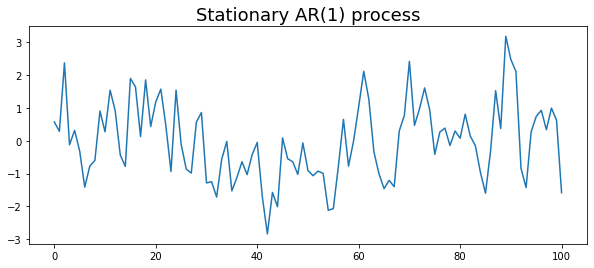

In [20]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title("Stationary AR(1) process", fontsize=18)

In [21]:
#Performing the Augmented Dickey-Fuller Test
perform_adf_test(ar_1_process)

ADF  Statistic : -5.503857
p-value : 0.000002


This p-value is a strong evidence that it is stationary

### Non-stationary

Text(0.5, 1.0, 'Non-stationary AR(1) Process')

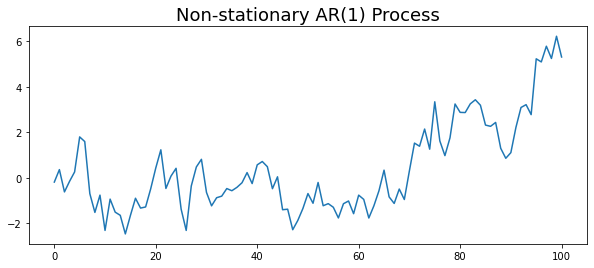

In [22]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title("Non-stationary AR(1) Process", fontsize=18)

In [23]:
#Performing the Augmented Dickey Fuller Test
perform_adf_test(ar_1_process_unit_root)

ADF  Statistic : -1.566185
p-value : 0.500554


This high p-value is a srong evidence that <b>our series is not stationary</b>

# AR(2) Process

### Stationary

Text(0.5, 1.0, 'AR(2) stationary process')

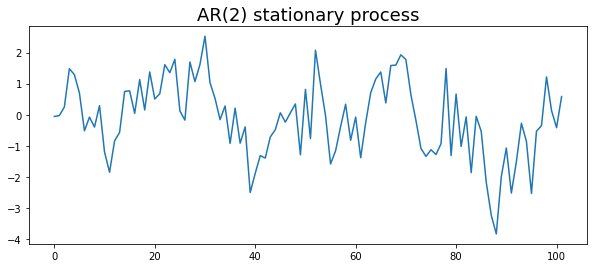

In [24]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title("AR(2) stationary process", fontsize=18)

In [25]:
#Performing the augmented Dickey-Fuller Test
perform_adf_test(ar_2_process)

ADF  Statistic : -3.446478
p-value : 0.009473


The low p-value indicates it's indeed stationary

### Non-stationary

Text(0.5, 1.0, 'AR(2) non-stationary process')

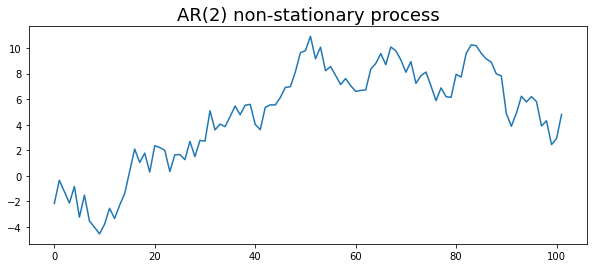

In [26]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title("AR(2) non-stationary process", fontsize=18)

In [27]:
#Performing the ADF test
perform_adf_test(ar_2_process_unit_root)

ADF  Statistic : -1.722988
p-value : 0.419309


This p-value is high enough to conclude that the series is not stationary